# Processing meshtally files with ALEPH

Import ALEPH!

In [1]:
import aleph

Meshtally is available in file `"proton_source.msht"`. 

In [2]:
file = "proton_source.msht"

Read the data from file.

In [3]:
out = aleph.MshtTally.from_file(file)

### What do I get as an output when running `aleph.MshtTally.from_file`?

A python dictionary with meshtally numbers as keys.

In [4]:
out

{3334: <aleph.meshtal.MshtTally at 0x2aefd953708>}

In this case there is only one...

In [5]:
out[3334]

### But where are the data?

They are accessible in attribute `data` and have a technically 4 dimensions `('Energy', 'X', 'Y', 'Z')` and two dependent outputs `('Result', 'RelError')`.
Dimensions and dependent variables depend on the specifications in the `fmesh` card in your MCNP input.

In [6]:
out[3334].data

,Energy,X,Y,Z,Result,RelError
0,6.05000e+02,-4.90000e+00,-4.90000e+00,0.00000e+00,0.00000e+00,0.00000e+00
1,6.05000e+02,-4.90000e+00,-4.70000e+00,0.00000e+00,0.00000e+00,0.00000e+00
2,6.05000e+02,-4.90000e+00,-4.50000e+00,0.00000e+00,0.00000e+00,0.00000e+00
3,6.05000e+02,-4.90000e+00,-4.30000e+00,0.00000e+00,0.00000e+00,0.00000e+00
4,6.05000e+02,-4.90000e+00,-4.10000e+00,0.00000e+00,0.00000e+00,0.00000e+00
...,...,...,...,...,...,...
2495,6.05000e+02,4.90000e+00,4.10000e+00,0.00000e+00,0.00000e+00,0.00000e+00
2496,6.05000e+02,4.90000e+00,4.30000e+00,0.00000e+00,0.00000e+00,0.00000e+00
2497,6.05000e+02,4.90000e+00,4.50000e+00,0.00000e+00,0.00000e+00,0.00000e+00
2498,6.05000e+02,4.90000e+00,4.70000e+00,0.00000e+00,0.00000e+00,0.00000e+00


This is the fmesh card used for this problem.

````
fmesh3334:h geom=xyz origin=-5 -5 -32.5
            imesh=5   iints=50
            jmesh=5   jints=50
            kmesh=32.5  kints=1
```

## Plotting

Import plotting package `matploltib`. 

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

Make a 2D plot of the data.

<IPython.core.display.Javascript object>


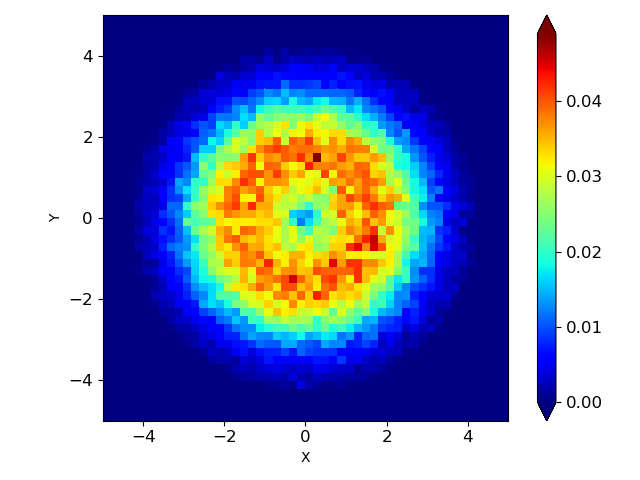

INFO:  NumExpr defaulting to 4 threads.


In [8]:
fig, ax = plt.subplots()

pcm = out[3334].plot(ax=ax, x="X", y="Y", values="Result", cmap="jet", aggfunc="mean", shading='auto')
cbar = plt.colorbar(pcm, shrink=1, extend='both', ax=ax)
cbar.ax.tick_params(labelsize="large")

ax.tick_params(axis='both', which='major', labelsize="large")
ax.set_aspect("equal")
plt.tight_layout();

Plot both data and statistical error.

<IPython.core.display.Javascript object>


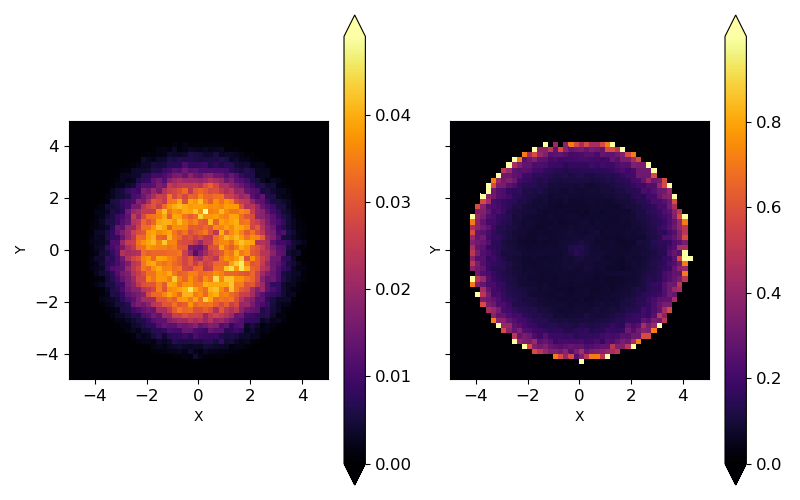

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5), sharex=True, sharey=True)


# plot on the left (source)
pcm = out[3334].plot(ax=axs[0], x="X", y="Y", values="Result", cmap="inferno", aggfunc="mean", shading='auto')
cbar = plt.colorbar(pcm, shrink=1, extend='both', ax=axs[0])
cbar.ax.tick_params(labelsize="large")
axs[0].set_aspect("equal")
axs[0].tick_params(axis='both', which='major', labelsize="large")


# plot on the right (stat. error)
pcm = out[3334].plot(ax=axs[1], x="X", y="Y", values="RelError", cmap="inferno", aggfunc="mean", shading='auto')
cbar = plt.colorbar(pcm, shrink=1, extend='both', ax=axs[1])
cbar.ax.tick_params(labelsize="large")
axs[1].set_aspect("equal")
axs[1].tick_params(axis='both', which='major', labelsize="large")


plt.tight_layout();

### What if I want to work only with a section of the data?

In [10]:
new = out[3334].filter_by("X > 0")

In [11]:
new.data

,Energy,X,Y,Z,Result,RelError
1250,6.05000e+02,1.00000e-01,-4.90000e+00,0.00000e+00,0.00000e+00,0.00000e+00
1251,6.05000e+02,1.00000e-01,-4.70000e+00,0.00000e+00,0.00000e+00,0.00000e+00
1252,6.05000e+02,1.00000e-01,-4.50000e+00,0.00000e+00,0.00000e+00,0.00000e+00
1253,6.05000e+02,1.00000e-01,-4.30000e+00,0.00000e+00,2.50000e-04,9.99995e-01
1254,6.05000e+02,1.00000e-01,-4.10000e+00,0.00000e+00,2.00000e-03,3.53539e-01
...,...,...,...,...,...,...
2495,6.05000e+02,4.90000e+00,4.10000e+00,0.00000e+00,0.00000e+00,0.00000e+00
2496,6.05000e+02,4.90000e+00,4.30000e+00,0.00000e+00,0.00000e+00,0.00000e+00
2497,6.05000e+02,4.90000e+00,4.50000e+00,0.00000e+00,0.00000e+00,0.00000e+00
2498,6.05000e+02,4.90000e+00,4.70000e+00,0.00000e+00,0.00000e+00,0.00000e+00


The values in column `'X'` starts from above zero!

<IPython.core.display.Javascript object>


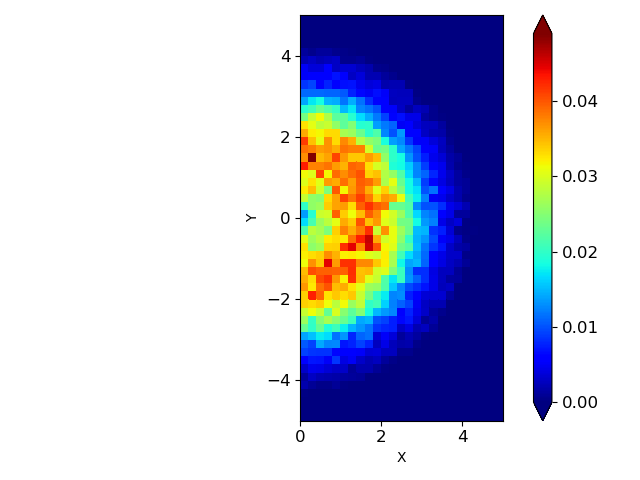

In [12]:
fig, ax = plt.subplots()

pcm = new.plot(ax=ax, x="X", y="Y", values="Result", cmap="jet", shading='auto')
cbar = plt.colorbar(pcm, shrink=1, extend='both', ax=ax)
cbar.ax.tick_params(labelsize="large")

ax.tick_params(axis='both', which='major', labelsize="large")
ax.set_aspect("equal")
plt.tight_layout();